In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime as dt

In [3]:
base_url = '/content/drive/MyDrive/CP01/'

articles = pd.read_csv(base_url + 'articles.csv')
customers = pd.read_csv(base_url + 'customers.csv')
transactions = pd.read_csv(base_url + 'transactions_train.csv')

In [4]:
articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [5]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [6]:
articles.describe().T

,count,mean,std,min,25%,50%,75%,max
article_id,105542.0,6.984246e+08,1.284624e+08,108775015.0,616992501.0,702213001.5,7.967030e+08,959461001.0
product_code,105542.0,6.984246e+05,1.284624e+05,108775.0,616992.5,702213.0,7.967030e+05,959461.0
product_type_no,105542.0,2.348619e+02,7.504931e+01,-1.0,252.0,259.0,2.720000e+02,762.0
graphical_appearance_no,105542.0,1.009515e+06,2.241359e+04,-1.0,1010008.0,1010016.0,1.010016e+06,1010029.0
colour_group_code,105542.0,3.223382e+01,2.808615e+01,-1.0,9.0,14.0,5.200000e+01,93.0
perceived_colour_value_id,105542.0,3.206183e+00,1.563839e+00,-1.0,2.0,4.0,4.000000e+00,7.0
perceived_colour_master_id,105542.0,7.807972e+00,5.376727e+00,-1.0,4.0,5.0,1.100000e+01,20.0
department_no,105542.0,4.532778e+03,2.712692e+03,1201.0,1676.0,4222.0,7.389000e+03,9989.0
index_group_no,105542.0,3.171534e+00,4.353234e+00,1.0,1.0,2.0,4.000000e+00,26.0
section_no,105542.0,4.266422e+01,2.326010e+01,2.0,20.0,46.0,6.100000e+01,97.0


In [7]:
customers.head(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [9]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
FN,476930.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Active,464404.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
age,1356119.0,36.386965,14.313628,16.0,24.0,32.0,49.0,99.0


In [10]:
transactions.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2


In [11]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [18]:
transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
article_id,31788324.0,6.962272e+08,1.334480e+08,1.087750e+08,6.328030e+08,7.145820e+08,7.865240e+08,9.562170e+08
price,31788324.0,2.782927e-02,1.918113e-02,1.694915e-05,1.581356e-02,2.540678e-02,3.388136e-02,5.915254e-01
sales_channel_id,31788324.0,1.704028e+00,4.564786e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00


In [13]:
transactions.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [14]:
transactions.nunique()

t_dat                   734
customer_id         1362281
article_id           104547
price                  9857
sales_channel_id          2
dtype: int64

In [15]:
df = transactions.copy()

In [16]:
df['date'] = pd.to_datetime(df['t_dat']).dt.date
df.drop(columns=['t_dat'], inplace=True)
df.head()

,customer_id,article_id,price,sales_channel_id,date
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018-09-20
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018-09-20
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018-09-20
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2018-09-20
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2018-09-20


In [19]:
df['date'].min(), df['date'].max()

(datetime.date(2018, 9, 20), datetime.date(2020, 9, 22))

In [20]:
NOW = dt.date(2020, 9, 23)

rfmTable = df.groupby('customer_id').agg({'date': lambda x: (NOW - x.max()).days,
                                                'article_id': lambda x: len(x),
                                                'price' : lambda x: round(x.sum(), 2)})

rfmTable["date"] = rfmTable["date"].astype(int)
rfmTable.rename(columns={'date': 'Recency',
                         'article_id': 'Frequency', 
                         'price': 'Monetary'}, inplace=True)

In [22]:
rfmTable.head()

,Recency,Frequency,Monetary
customer_id,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,18,21,0.65
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,77,86,2.60
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,18,0.70
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,472,2,0.06
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,13,0.47


In [23]:
customer_test = df[df['customer_id'] == '0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a']
customer_test

,customer_id,article_id,price,sales_channel_id,date
11324052,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,735843004,0.025407,2,2019-06-04
11324053,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,726925001,0.016932,2,2019-06-04
18148893,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,715624008,0.025407,2,2019-10-22
18148894,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,783388001,0.022017,2,2019-10-22
31492019,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,719530003,0.033881,2,2020-09-14
31492020,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,448509014,0.042356,2,2020-09-14


In [24]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,49.0,3.0,0.09
0.50,152.0,9.0,0.25
0.75,399.0,27.0,0.70


In [25]:
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 3.0, 0.5: 9.0, 0.75: 27.0},
 'Monetary': {0.25: 0.09, 0.5: 0.25, 0.75: 0.7},
 'Recency': {0.25: 49.0, 0.5: 152.0, 0.75: 399.0}}

In [26]:
# Create two classes for the RFM segmentation

rfmSegmentation = rfmTable.copy()

# Arguments (x = value, p = recency, frequency, monetary, d = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

# Arguments (x = value, p = recency, frequency, monetary, d = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [27]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['Recency'].apply(RClass, args=('Recency', quantiles))
rfmSegmentation['F_Quartile'] = rfmSegmentation['Frequency'].apply(FMClass, args=('Frequency', quantiles))
rfmSegmentation['M_Quartile'] = rfmSegmentation['Monetary'].apply(FMClass, args=('Monetary', quantiles))

rfmSegmentation['RFM_Scores'] = rfmSegmentation.R_Quartile.apply(str) \
                            + rfmSegmentation.F_Quartile.apply(str) \
                            + rfmSegmentation.M_Quartile.apply(str)
rfmSegmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores
customer_id,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,18,21,0.65,4,3,3,433
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,77,86,2.60,3,4,4,344
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,18,0.70,4,3,3,433
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,472,2,0.06,1,1,1,111
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,13,0.47,4,3,3,433


- If RFM_Scores == '444', then "1-Best Customers"
- If RFM_Scores == 'X4X', then "2-Loyal Customers"
- If RFM_Scores == 'XX4', then "3-Big Spenders"
- If RFM_Scores == '244', then "4-Almost Lost"
- If RFM_Scores == '144', then "5-Lost Customers"
- If RFM_Scores == '111', then "6-Lost Cheap Customers"

In [28]:
label = list(np.zeros(len(rfmSegmentation)))

for i in range(len(rfmSegmentation)):
    if rfmSegmentation['RFM_Scores'].iloc[i] =='444':
      label[i] = "1-Best Customers"  
    elif rfmSegmentation['RFM_Scores'].iloc[i][1]=='4':
      label[i] = "2-Loyal Customers"
    elif rfmSegmentation['RFM_Scores'].iloc[i][2]=='4': 
      label[i] = "3-Big Spenders"
    elif rfmSegmentation['RFM_Scores'].iloc[i]=='244' : 
      label[i] = "4-Almost Lost"
    elif rfmSegmentation['RFM_Scores'].iloc[i]=='144' : 
      label[i] = "5-Lost Customers"
    elif rfmSegmentation['RFM_Scores'].iloc[i] =='111' : 
      label[i] = "6-Lost Cheap Customers"

In [29]:
Loyal_Customers=['433']
Big_Spenders=['413','432','423']
Almost_Lost=['333','233','422','331','313','431','323']
Lost_Customers=['222','311','322','223','332','411','133','132','312','131','123','213','113','421','412','231','321','232']
Lost_Cheap_Customers=['122','211','112','121','212','221']

for i in range(len(rfmSegmentation)):
    if rfmSegmentation['RFM_Scores'].iloc[i] in Loyal_Customers : 
      label[i] = "2-Loyal Customers"
    elif rfmSegmentation['RFM_Scores'].iloc[i] in Big_Spenders : 
      label[i] = "3-Big Spenders"
    elif rfmSegmentation['RFM_Scores'].iloc[i] in Almost_Lost : 
      label[i] = "4-Almost Lost"
    elif rfmSegmentation['RFM_Scores'].iloc[i] in Lost_Customers : 
      label[i] = "5-Lost Customers"
    elif rfmSegmentation['RFM_Scores'].iloc[i] in Lost_Cheap_Customers  : 
      label[i] = "6-Lost Cheap Customers"       

In [31]:
rfmSegmentation['RFM_Scores_Segments'] = label
rfmSegmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores,RFM_Scores_Segments
customer_id,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,18,21,0.65,4,3,3,433,2-Loyal Customers
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,77,86,2.60,3,4,4,344,2-Loyal Customers
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,18,0.70,4,3,3,433,2-Loyal Customers
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,472,2,0.06,1,1,1,111,6-Lost Cheap Customers
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,13,0.47,4,3,3,433,2-Loyal Customers


In [32]:
rfmSegmentation.RFM_Scores_Segments.value_counts().sort_index()

1-Best Customers          171042
2-Loyal Customers         230433
3-Big Spenders             51750
4-Almost Lost             191976
5-Lost Customers          322691
6-Lost Cheap Customers    394389
Name: RFM_Scores_Segments, dtype: int64

- If RFM_Points == 12, then "1-Best Customers"
- If RFM_Points == 11, then "2-Loyal Customers"
- If 9 <= RFM_Points <=10, then "3-Big Spenders"
- If 7 <= RFM_Points <=8, then "4-Almost Lost"
- If 4 <= RFM_Points <=6, then "5-Lost Customers"
- If 3 == RFM_Points, "6-Lost Cheap Customers"

In [33]:
rfmSegmentation['RFM_Points'] = rfmSegmentation[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1).astype('float')

In [34]:
label = list(np.zeros(len(rfmSegmentation)))

for i in range(len(rfmSegmentation)):
    if rfmSegmentation['RFM_Points'].iloc[i] ==12 :
      label[i] = "1-Best Customers"
    elif rfmSegmentation['RFM_Points'].iloc[i] ==11 :
      label[i] = "2-Loyal Customers"
    elif rfmSegmentation['RFM_Points'].iloc[i] >= 9 :
      label[i] = "3-Big Spenders"
    elif rfmSegmentation['RFM_Points'].iloc[i] >= 7 :
      label[i] = "4-Almost Lost"
    elif rfmSegmentation['RFM_Points'].iloc[i] >= 5 :
      label[i] = "5-Lost Customers"
    else : label[i] = "6-Lost Cheap Customers"

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores,RFM_Scores_Segments,RFM_Points,RFM_Points_Segments
customer_id,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,18,21,0.65,4,3,3,433,2-Loyal Customers,10.0,3-Big Spenders
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,77,86,2.60,3,4,4,344,2-Loyal Customers,11.0,2-Loyal Customers
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,18,0.70,4,3,3,433,2-Loyal Customers,10.0,3-Big Spenders
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,472,2,0.06,1,1,1,111,6-Lost Cheap Customers,3.0,6-Lost Cheap Customers
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,13,0.47,4,3,3,433,2-Loyal Customers,10.0,3-Big Spenders
000064249685c11552da43ef22a5030f35a147f723d5b02ddd9fd22452b1f5a6,357,3,0.10,2,1,2,212,6-Lost Cheap Customers,5.0,5-Lost Customers
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,9,6,0.17,4,2,2,422,4-Almost Lost,8.0,4-Almost Lost
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,133,120,3.82,3,4,4,344,2-Loyal Customers,11.0,2-Loyal Customers
00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77334eaec4ffccd7ebcc,262,2,0.05,2,1,1,211,6-Lost Cheap Customers,4.0,6-Lost Cheap Customers


In [36]:
rfmSegmentation['RFM_Points_Segments'] = label
rfmSegmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores,RFM_Scores_Segments,RFM_Points,RFM_Points_Segments
customer_id,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,18,21,0.65,4,3,3,433,2-Loyal Customers,10.0,3-Big Spenders
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,77,86,2.60,3,4,4,344,2-Loyal Customers,11.0,2-Loyal Customers
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,18,0.70,4,3,3,433,2-Loyal Customers,10.0,3-Big Spenders
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,472,2,0.06,1,1,1,111,6-Lost Cheap Customers,3.0,6-Lost Cheap Customers
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,13,0.47,4,3,3,433,2-Loyal Customers,10.0,3-Big Spenders


In [37]:
rfmSegmentation.RFM_Points_Segments.value_counts().sort_index()

1-Best Customers          171042
2-Loyal Customers         115112
3-Big Spenders            246414
4-Almost Lost             252900
5-Lost Customers          292401
6-Lost Cheap Customers    284412
Name: RFM_Points_Segments, dtype: int64

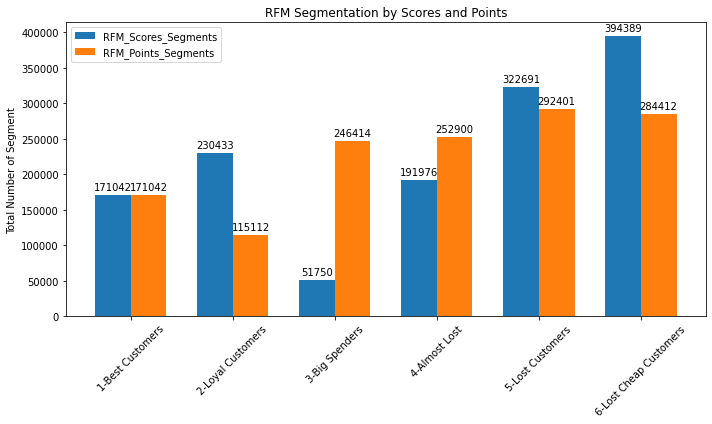

In [38]:
labels = list(rfmSegmentation.RFM_Scores_Segments.value_counts().sort_index().index)
RFM_Scores_Segments = list(rfmSegmentation.RFM_Scores_Segments.value_counts().sort_index().values)
RFM_Points_Segments = list(rfmSegmentation.RFM_Points_Segments.value_counts().sort_index().values)

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, RFM_Scores_Segments, width, label='RFM_Scores_Segments')
rects2 = ax.bar(x + width/2, RFM_Points_Segments, width, label='RFM_Points_Segments')

ax.set_ylabel('Total Number of Segment')
ax.set_title('RFM Segmentation by Scores and Points')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

plt.show()

Distribution of Clustering Based on RFM_Points is more successful. It is closer to normal distribution, even through left skewed.

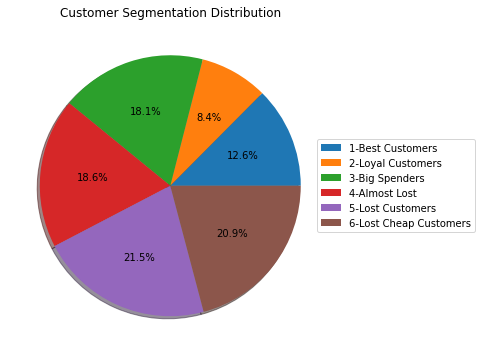

In [39]:
plt.figure(figsize=(6,6))

plt.pie(rfmSegmentation['RFM_Points_Segments'].value_counts().sort_index(),autopct='%1.1f%%',shadow=True,startangle=0)
plt.legend(rfmSegmentation['RFM_Points_Segments'].value_counts().sort_index().index,bbox_to_anchor=(1.45,0.5),loc='center right')
plt.title('Customer Segmentation Distribution')
plt.axis('off')
plt.show()

In [40]:
rfmSegmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Scores,RFM_Scores_Segments,RFM_Points,RFM_Points_Segments
customer_id,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,18,21,0.65,4,3,3,433,2-Loyal Customers,10.0,3-Big Spenders
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,77,86,2.60,3,4,4,344,2-Loyal Customers,11.0,2-Loyal Customers
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,18,0.70,4,3,3,433,2-Loyal Customers,10.0,3-Big Spenders
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,472,2,0.06,1,1,1,111,6-Lost Cheap Customers,3.0,6-Lost Cheap Customers
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,13,0.47,4,3,3,433,2-Loyal Customers,10.0,3-Big Spenders


In [41]:
rfmSeg_table = rfmSegmentation.drop(['RFM_Scores', 'RFM_Scores_Segments'], axis=1)

In [42]:
rfmSeg_table.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Points,RFM_Points_Segments
customer_id,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,18,21,0.65,4,3,3,10.0,3-Big Spenders
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,77,86,2.60,3,4,4,11.0,2-Loyal Customers
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,18,0.70,4,3,3,10.0,3-Big Spenders
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,472,2,0.06,1,1,1,3.0,6-Lost Cheap Customers
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,13,0.47,4,3,3,10.0,3-Big Spenders


In [ ]:
rfmSeg_table.to_csv('rfmSegmentation_tableau.csv')

K-MEANS Clustering

In [43]:
rfm_kmeans=rfmSegmentation[['Recency', 'Frequency', 'Monetary']]

In [44]:
from sklearn.preprocessing import StandardScaler

rfm_scaled = pd.DataFrame(StandardScaler().fit_transform(rfm_kmeans),
                          columns=rfm_kmeans.columns,index=rfm_kmeans.index)
rfm_scaled.head()

,Recency,Frequency,Monetary
customer_id,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,-0.986567,-0.059493,0.000536
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,-0.719742,1.596886,1.628803
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,-1.031792,-0.135941,0.042286
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,1.066629,-0.543665,-0.492119
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,-0.878028,-0.263355,-0.149766


In [45]:
pip install yellowbrick

     |████████████████████████████████| 274 kB 13.5 MB/s 


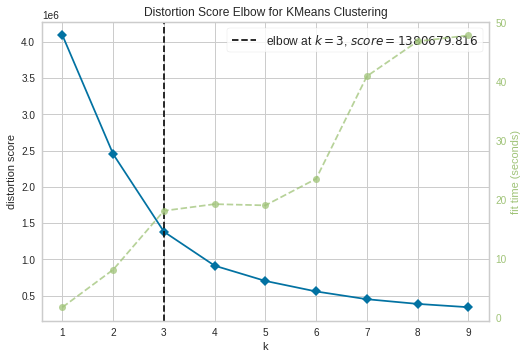

In [46]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
k_elbow = KElbowVisualizer(kmeans, k = (1,10))
k_elbow.fit(rfm_scaled)
k_elbow.show();

In [47]:
kmeans = KMeans(n_clusters = 3).fit(rfm_scaled)
labels = kmeans.labels_
rfm_scaled['Kmeans_Label_ID']=labels

In [52]:
keys=rfm_scaled.groupby('Kmeans_Label_ID').Frequency.mean().sort_values().index
values=['Bronze','Silver','Gold']
dictionary = dict(zip(keys, values))

rfm_scaled['Kmeans_Label']=rfm_scaled.Kmeans_Label_ID.apply(lambda x:dictionary[x] )
rfm_scaled.head()

,Recency,Frequency,Monetary,Kmeans_Label_ID,Kmeans_Label
customer_id,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,-0.986567,-0.059493,0.000536,0,Silver
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,-0.719742,1.596886,1.628803,2,Gold
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,-1.031792,-0.135941,0.042286,0,Silver
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,1.066629,-0.543665,-0.492119,1,Bronze
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,-0.878028,-0.263355,-0.149766,0,Silver


In [49]:
rfm_scaled.Kmeans_Label.value_counts().sort_index()

Bronze    451777
Gold       74358
Silver    836146
Name: Kmeans_Label, dtype: int64

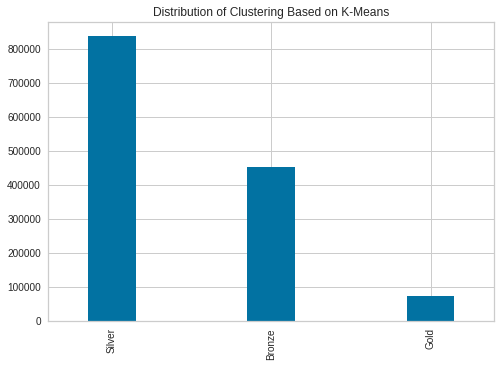

In [50]:
rfm_scaled.Kmeans_Label.value_counts().plot.bar(width=0.3)
plt.title('Distribution of Clustering Based on K-Means');

In [51]:
RFM_Points_Segments=['1-Best Customers','2-Loyal Customers', '3-Big Spenders', '4-Almost Lost', '5-Lost Customers', '6-Lost Cheap Customers']
Kmeans_Label=['Gold', 'Silver', 'Bronze']
pd.crosstab(rfm_scaled['Kmeans_Label'], rfmSegmentation['RFM_Points_Segments'])[RFM_Points_Segments].loc[Kmeans_Label]

RFM_Points_Segments,1-Best Customers,2-Loyal Customers,3-Big Spenders,4-Almost Lost,5-Lost Customers,6-Lost Cheap Customers
Kmeans_Label,,,,,,
Gold,54909,15535,3914,0,0,0
Silver,116133,99577,233412,188037,148883,50104
Bronze,0,0,9088,64863,143518,234308
